In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import cv2
import glob
import tifffile as tiff
import matplotlib.pyplot as plt

In [2]:
image_list = []
code = []

for filename in glob.glob('L_LPA/*.tiff'):
    img = tiff.imread(filename)
    image_list.append(img)
    code.append(os.path.basename(filename).split('.tiff')[0])
    print(filename)
    

L_LPA\ADM001_Tmap_T15_L_LPA.tiff
L_LPA\ADM004_Tmap_T15_L_LPA.tiff
L_LPA\CTA002_Tmap_T15_L_LPA.tiff
L_LPA\CTA003_Tmap_T15_L_LPA.tiff
L_LPA\CTA004_Tmap_T15_L_LPA.tiff
L_LPA\ESP001_Tmap_T15_L_LPA.tiff
L_LPA\ESP002_Tmap_T15_L_LPA.tiff
L_LPA\ESP003_Tmap_T15_L_LPA.tiff
L_LPA\ESP006_Tmap_T15_L_LPA.tiff
L_LPA\ESP008_Tmap_T15_L_LPA.tiff
L_LPA\ESP009_Tmap_T15_L_LPA.tiff
L_LPA\ESP010_Tmap_T15_L_LPA.tiff
L_LPA\ESP011_Tmap_T15_L_LPA.tiff
L_LPA\EST004_Tmap_T15_L_LPA.tiff
L_LPA\EXT003_Tmap_T15_L_LPA.tiff
L_LPA\MED001_Tmap_T15_L_LPA.tiff
L_LPA\MED002_Tmap_T15_L_LPA.tiff
L_LPA\MED006_Tmap_T15_L_LPA.tiff
L_LPA\NRT001_Tmap_T15_L_LPA.tiff
L_LPA\NRT002_Tmap_T15_L_LPA.tiff
L_LPA\NRT003_Tmap_T15_L_LPA.tiff
L_LPA\NRT004_Tmap_T15_L_LPA.tiff


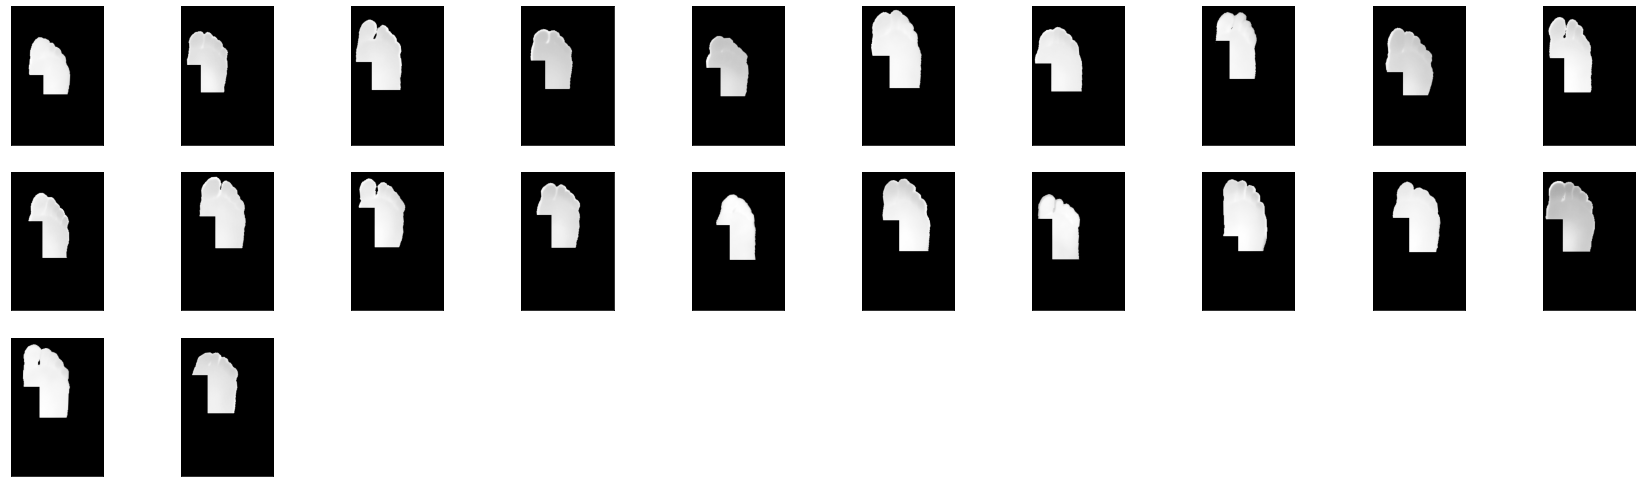

In [3]:
# Plot image for checking purposes
# Specify the overall grid size
plt.figure(figsize=(30,30)) 

for i in range(len(image_list)):
    # The number of images in the grid is 22 distributed in a 10 by 10 matrix
    plt.subplot(10,10,i+1)    
    plt.imshow(image_list[i], cmap=plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
# Extract mean value for each angiosome on each image
# Define list in which data will be stored
L_LPA_mean = []
L_LPA_std = []
L_LPA_max = []
L_LPA_min = []
L_LPA_skew = []
L_LPA_kurtosis = []
L_LPA_img = []

subject = []

for i in range(len(image_list)):
    # Save image as array
    img = np.asarray(image_list[i][image_list[i] > 0])
    L_LPA_img.append(img)
    # Mean value
    img_mean = np.mean(image_list[i][image_list[i] > 0])   
    L_LPA_mean.append(img_mean)
    # Standard deviation 
    img_std = np.std(image_list[i][image_list[i] > 0])   
    L_LPA_std.append(img_std)
    # Maximum value
    img_max = np.max(image_list[i][image_list[i] > 0])   
    L_LPA_max.append(img_max)
    # Minimum value
    img_min = np.min(image_list[i][image_list[i] > 0])   
    L_LPA_min.append(img_min)
    # Skew
    img_skew = skew(image_list[i][image_list[i] > 0])   
    L_LPA_skew.append(img_skew)
    # Kurtosis
    img_kurtosis = kurtosis(image_list[i][image_list[i] > 0])   
    L_LPA_kurtosis.append(img_kurtosis)
    # Subject
    subject.append(code[i])
    print(subject[i], L_LPA_mean[i], L_LPA_std[i], L_LPA_max[i], L_LPA_min[i], L_LPA_skew[i], L_LPA_kurtosis[i])   


ADM001_Tmap_T15_L_LPA 27.022905 3.4447963 30.800222 0.07650252 -5.130743863168493 30.354615656183675
ADM004_Tmap_T15_L_LPA 19.611504 2.6163745 24.47682 0.04174543 -3.9296868445441397 22.54011478064084
CTA002_Tmap_T15_L_LPA 23.33563 2.975512 27.986326 0.048687622 -4.804245746140518 28.8083362066758
CTA003_Tmap_T15_L_LPA 22.338482 2.8730447 30.681742 0.11072725 -3.8925331060096617 25.231469186433774
CTA004_Tmap_T15_L_LPA 20.124294 2.7924519 27.949995 0.04220824 -3.4072121422984747 19.982687510749784
ESP001_Tmap_T15_L_LPA 25.668 3.0149815 29.048943 0.0758083 -5.435245740101819 35.28444386453455
ESP002_Tmap_T15_L_LPA 25.407696 2.9202337 29.572845 0.27236387 -5.418942857386564 35.78893030638614
ESP003_Tmap_T15_L_LPA 26.796318 3.647907 30.918703 0.1252363 -4.618886879760465 25.034323307742145
ESP006_Tmap_T15_L_LPA 22.268774 2.9767132 29.914864 0.05262152 -3.667637557426992 21.94908977522435
ESP008_Tmap_T15_L_LPA 24.232174 3.4677048 28.25742 0.12384785 -3.5054117976534327 17.863025922439835
E

In [5]:
# Initialize data of lists
data = {'Subject': subject,
        'L_LPA_mean': L_LPA_mean, 
        'L_LPA_std': L_LPA_std,
        'L_LPA_max': L_LPA_max,
        'L_LPA_min': L_LPA_min,
        'L_LPA_skew': L_LPA_skew,
        'L_LPA_kurtosis': L_LPA_kurtosis}
  
# Create DataFrame
df = pd.DataFrame(data)
display(df)

df.to_csv('L_LPA.csv', index=False) 

,Subject,L_LPA_mean,L_LPA_std,L_LPA_max,L_LPA_min,L_LPA_skew,L_LPA_kurtosis
0,ADM001_Tmap_T15_L_LPA,27.022905,3.444796,30.800222,0.076503,-5.130744,30.354616
1,ADM004_Tmap_T15_L_LPA,19.611504,2.616374,24.476820,0.041745,-3.929687,22.540115
2,CTA002_Tmap_T15_L_LPA,23.335630,2.975512,27.986326,0.048688,-4.804246,28.808336
3,CTA003_Tmap_T15_L_LPA,22.338482,2.873045,30.681742,0.110727,-3.892533,25.231469
4,CTA004_Tmap_T15_L_LPA,20.124294,2.792452,27.949995,0.042208,-3.407212,19.982688
5,ESP001_Tmap_T15_L_LPA,25.667999,3.014982,29.048943,0.075808,-5.435246,35.284444
6,ESP002_Tmap_T15_L_LPA,25.407696,2.920234,29.572845,0.272364,-5.418943,35.788930
7,ESP003_Tmap_T15_L_LPA,26.796318,3.647907,30.918703,0.125236,-4.618887,25.034323
8,ESP006_Tmap_T15_L_LPA,22.268774,2.976713,29.914864,0.052622,-3.667638,21.949090
9,ESP008_Tmap_T15_L_LPA,24.232174,3.467705,28.257420,0.123848,-3.505412,17.863026


In [6]:
# Total values for this angiosome
# Concatenate all data for extracting parameters
L_LPA_all = np.concatenate((L_LPA_img[0],L_LPA_img[1],L_LPA_img[2],L_LPA_img[3],L_LPA_img[4],L_LPA_img[5],
                            L_LPA_img[6],L_LPA_img[7],L_LPA_img[8],L_LPA_img[9],L_LPA_img[10],L_LPA_img[11],
                            L_LPA_img[12],L_LPA_img[13],L_LPA_img[14],L_LPA_img[15],L_LPA_img[16],L_LPA_img[17],
                            L_LPA_img[18],L_LPA_img[19],L_LPA_img[20],L_LPA_img[21]))
L_LPA_all_mean = np.mean(L_LPA_all)
L_LPA_all_std = np.std(L_LPA_all)
L_LPA_all_max = np.max(L_LPA_all)
L_LPA_all_min = np.min(L_LPA_all)
L_LPA_all_skew = skew(L_LPA_all)
L_LPA_all_kurtosis = kurtosis(L_LPA_all)


# Initialize data of lists
data2 = {'Variables':['L_LPA_all_mean', 'L_LPA_all_std', 'L_LPA_all_max', 'L_LPA_all_min', 'L_LPA_all_skew', 
                      'L_LPA_all_kurtosis'],
         'Values': [L_LPA_all_mean, L_LPA_all_std, L_LPA_all_max, L_LPA_all_min, L_LPA_all_skew, L_LPA_all_kurtosis]}
  
# Create DataFrame
df2 = pd.DataFrame(data2)
display(df2)

df2.to_csv('L_LPA_all.csv', index=False) 


,Variables,Values
0,L_LPA_all_mean,24.134108
1,L_LPA_all_std,4.069685
2,L_LPA_all_max,32.571877
3,L_LPA_all_min,0.021798
4,L_LPA_all_skew,-1.841130
5,L_LPA_all_kurtosis,7.646951


In [7]:
a_file = open("L_LPA.txt", "w")
np.savetxt(a_file, L_LPA_all)
a_file.close()